In [1]:
import pandas as pd
import numpy as np

In [2]:
sd = pd.DataFrame({'name' : [np.nan , 'cde' , np.nan , 'xyz' , 'mno' , 'cde'],
                   'region' : [np.nan , 'b' , 'c' , 'd' , 'e' , 'b'],
                   'sales' : [np.nan , 20 , 30 , np.nan , 50 , 20],
                   'expence' : [np.nan , 200 , 300 , np.nan , np.nan , 200]})
print(sd)
print(sd.isna())
print(sd.isna().sum())
print(sd.dropna(how = "any"))

  name region  sales  expence
0  NaN    NaN    NaN      NaN
1  cde      b   20.0    200.0
2  NaN      c   30.0    300.0
3  xyz      d    NaN      NaN
4  mno      e   50.0      NaN
5  cde      b   20.0    200.0
    name  region  sales  expence
0   True    True   True     True
1  False   False  False    False
2   True   False  False    False
3  False   False   True     True
4  False   False  False     True
5  False   False  False    False
name       2
region     1
sales      2
expence    3
dtype: int64
  name region  sales  expence
1  cde      b   20.0    200.0
5  cde      b   20.0    200.0


In [3]:
# Thresh will keep only rows with atlest given non-na values
sd.dropna(thresh = 2)

,name,region,sales,expence
1,cde,b,20.0,200.0
2,NaN,c,30.0,300.0
3,xyz,d,NaN,NaN
4,mno,e,50.0,NaN
5,cde,b,20.0,200.0


In [4]:
sd.dropna(subset = ['sales' , 'expence'])

,name,region,sales,expence
1,cde,b,20.0,200.0
2,NaN,c,30.0,300.0
5,cde,b,20.0,200.0


In [5]:
sd.dropna(axis = 'columns' , inplace = False)

""
0
1
2
3
4
5


In [6]:
sd.fillna('python')

,name,region,sales,expence
0,python,python,python,python
1,cde,b,20,200
2,python,c,30,300
3,xyz,d,python,python
4,mno,e,50,python
5,cde,b,20,200


In [7]:
sd.drop(5 , axis = 0)

,name,region,sales,expence
0,NaN,NaN,NaN,NaN
1,cde,b,20.0,200.0
2,NaN,c,30.0,300.0
3,xyz,d,NaN,NaN
4,mno,e,50.0,NaN


In [8]:
sd.drop_duplicates()

,name,region,sales,expence
0,NaN,NaN,NaN,NaN
1,cde,b,20.0,200.0
2,NaN,c,30.0,300.0
3,xyz,d,NaN,NaN
4,mno,e,50.0,NaN


# Outliers

In [9]:
df = pd.DataFrame([[1000],[2000],[3000],[4000],[5000],
                   [6000],[7000],[8000],[9000],[20000]],columns = ['salary'])
df
def outlier(datacolumn):
    sorted(datacolumn)
    Q1 , Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lr = Q1 - 1.5 * IQR
    ur = Q3 + 1.5 * IQR
    return lr , ur
lr , ur = outlier(df['salary'])
df.drop(df[(df.salary > ur) | (df.salary < lr)].index , inplace = True)
df

,salary
0,1000
1,2000
2,3000
3,4000
4,5000
5,6000
6,7000
7,8000
8,9000


In [10]:
# 25

df = pd.read_csv("mydata.csv")
df
df.dropna()

,Unnamed: 0,Name,Region,Sales,Expenses
1,1,Emma,North,52000.0,43000.0
4,4,Edward,West,42000.0,38000.0
5,5,Thomas,West,72000.0,390000.0
6,6,Ethan,South,49000.0,42000.0
8,8,Arun,West,67000.0,39000.0
9,9,Anika,East,65000.0,50000.0
10,10,Paulo,South,67000.0,45000.0


In [11]:
# 26

df = pd.read_csv("mydata.csv")
df
df.dropna(how = 'any')

,Unnamed: 0,Name,Region,Sales,Expenses
1,1,Emma,North,52000.0,43000.0
4,4,Edward,West,42000.0,38000.0
5,5,Thomas,West,72000.0,390000.0
6,6,Ethan,South,49000.0,42000.0
8,8,Arun,West,67000.0,39000.0
9,9,Anika,East,65000.0,50000.0
10,10,Paulo,South,67000.0,45000.0


In [12]:
# 27

df = pd.read_csv("mydata.csv")
df
df.dropna(axis = 1)

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [13]:
# 29

df = pd.read_csv("mydata.csv")
df
print(df.drop_duplicates())
print(df.reset_index())

    Unnamed: 0     Name Region    Sales  Expenses
0            0  William    NaN  50000.0   42000.0
1            1     Emma  North  52000.0   43000.0
2            2    Sofia   East      NaN       NaN
3            3   Markus    NaN      NaN       NaN
4            4   Edward   West  42000.0   38000.0
5            5   Thomas   West  72000.0  390000.0
6            6    Ethan  South  49000.0   42000.0
7            7      NaN    NaN      NaN       NaN
8            8     Arun   West  67000.0   39000.0
9            9    Anika   East  65000.0   50000.0
10          10    Paulo  South  67000.0   45000.0
    index  Unnamed: 0     Name Region    Sales  Expenses
0       0           0  William    NaN  50000.0   42000.0
1       1           1     Emma  North  52000.0   43000.0
2       2           2    Sofia   East      NaN       NaN
3       3           3   Markus    NaN      NaN       NaN
4       4           4   Edward   West  42000.0   38000.0
5       5           5   Thomas   West  72000.0  390000.0
6

In [14]:
# 30

df = pd.read_csv("auto-mpg.csv")
df
df = df.drop(['mpg' , 'cylinders'], axis=1)
df

,displacement,horsepower,weight,acceleration,model year,origin,car name
0,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,350.0,165,3693,11.5,70,1,buick skylark 320
2,318.0,150,3436,11.0,70,1,plymouth satellite
3,304.0,150,3433,12.0,70,1,amc rebel sst
4,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...
393,140.0,86,2790,15.6,82,1,ford mustang gl
394,97.0,52,2130,24.6,82,2,vw pickup
395,135.0,84,2295,11.6,82,1,dodge rampage
396,120.0,79,2625,18.6,82,1,ford ranger


         Height      Weight  Male
0     73.847017  241.893563     1
1     68.781904  162.310473     1
2     74.110105  212.740856     1
3     71.730978  220.042470     1
4     69.881796  206.349801     1
...         ...         ...   ...
9995  66.172652  136.777454     0
9996  67.067155  170.867906     0
9997  63.867992  128.475319     0
9998  69.034243  163.852461     0
9999  61.944246  113.649103     0

[10000 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
 2   Male    10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB
None
             Height        Weight          Male
count  10000.000000  10000.000000  10000.000000
mean      66.367560    161.440357      0.500000
std        3.847528     32.108439      0.500025
min       54.263133     6

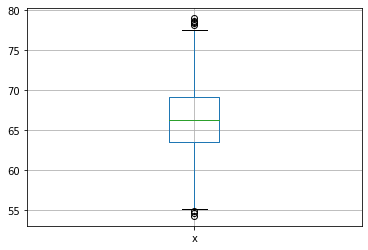

In [15]:
# 31

df = pd.read_csv("heights_weights.csv")
print(df)
print(df.info())
print(df.describe())
print(df.corr())
print(pd.plotting.boxplot(df['Height']))

AxesSubplot(0.125,0.125;0.775x0.755)


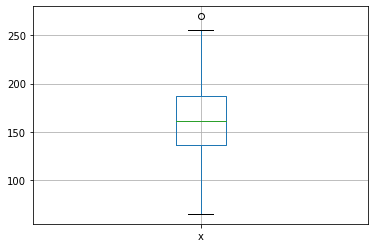

In [16]:
# 31

print(pd.plotting.boxplot(df['Weight']))

In [17]:
# 31

Q1 , Q3 = np.percentile(df['Height'],[25,75])
IQR = Q3 - Q1
lr = Q1 - 1.5 * IQR
ur = Q3 + 1.5 * IQR
out = df[(df.Height > ur) | (df.Height < lr)]
out

,Height,Weight,Male
994,78.095867,255.690835,1
1317,78.462053,227.342565,1
2014,78.998742,269.989699,1
3285,78.528210,253.889004,1
3757,78.621374,245.733783,1
6624,54.616858,71.393749,0
7294,54.873728,78.606670,0
9285,54.263133,64.700127,0


In [18]:
# 32

df = pd.read_csv("ipl-matches.csv")
df
superover = df[df['SuperOver'] == 'Y']
superover

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
114,1254077,Chennai,2021-04-25,2021,20,Delhi Capitals,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,bat,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...","['DA Warner', 'JM Bairstow', 'KS Williamson', ...",CB Gaffaney,KN Ananthapadmanabhan
158,1216512,Abu Dhabi,2020-10-18,2020/21,35,Kolkata Knight Riders,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Y,Kolkata Knight Riders,SuperOver,NaN,NaN,LH Ferguson,"['Shubman Gill', 'RA Tripathi', 'N Rana', 'AD ...","['JM Bairstow', 'KS Williamson', 'PK Garg', 'D...",PG Pathak,S Ravi
159,1216517,NaN,2020-10-18,2020/21,36,Mumbai Indians,Kings XI Punjab,Dubai International Cricket Stadium,Mumbai Indians,bat,Y,Kings XI Punjab,SuperOver,NaN,NaN,KL Rahul,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Poor...",Nitin Menon,PR Reiffel
184,1216547,NaN,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
192,1216493,NaN,2020-09-20,2020/21,2,Delhi Capitals,Kings XI Punjab,Dubai International Cricket Stadium,Kings XI Punjab,field,Y,Delhi Capitals,SuperOver,NaN,NaN,MP Stoinis,"['PP Shaw', 'S Dhawan', 'SO Hetmyer', 'SS Iyer...","['KL Rahul', 'MA Agarwal', 'KK Nair', 'N Poora...",AK Chaudhary,Nitin Menon
203,1178426,Mumbai,2019-05-02,2019,51,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,Mumbai Indians,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,JJ Bumrah,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'E Lewi...","['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...",CK Nandan,S Ravi
244,1175365,Delhi,2019-03-30,2019,10,Kolkata Knight Riders,Delhi Capitals,Arun Jaitley Stadium,Delhi Capitals,field,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['NS Naik', 'CA Lynn', 'RV Uthappa', 'N Rana',...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,Nitin Menon
339,1082625,Rajkot,2017-04-29,2017,35,Gujarat Lions,Mumbai Indians,Saurashtra Cricket Association Stadium,Gujarat Lions,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,KH Pandya,"['Ishan Kishan', 'BB McCullum', 'SK Raina', 'A...","['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharm...",AK Chaudhary,CB Gaffaney
474,829741,Ahmedabad,2015-04-21,2015,18,Rajasthan Royals,Kings XI Punjab,"Sardar Patel Stadium, Motera",Kings XI Punjab,field,Y,Kings XI Punjab,SuperOver,NaN,NaN,SE Marsh,"['AM Rahane', 'SR Watson', 'DJ Hooda', 'SPD Sm...","['M Vijay', 'V Sehwag', 'SE Marsh', 'GJ Maxwel...",M Erasmus,S Ravi
533,729315,Abu Dhabi,2014-04-29,2014,19,Kolkata Knight Riders,Rajasthan Royals,Sheikh Zayed Stadium,Rajasthan Royals,bat,Y,Rajasthan Royals,SuperOver,NaN,NaN,JP Faulkner,"['G Gambhir', 'MS Bisla', 'JH Kallis', 'MK Pan...","['AM Rahane', 'KK Nair', 'SV Samson', 'SR Wats...",Aleem Dar,AK Chaudhary


In [19]:
# 32

cskwin = df[(df["WinningTeam"] == 'Chennai Super Kings') & (df["City"] == "Kolkata")]
cskwin
print(len(cskwin))

5


In [20]:
msdvsmi = df[(df["Player_of_Match"] == "MS Dhoni") & ((df['Team1'] == "Mumbai Indians") | 
                                                      (df['Team2'] == "Mumbai Indians"))]
msdvsmi
print(len(msdvsmi))

1


In [21]:
gtwin = df[(df["TossWinner"] == "Gujarat Titans") & 
           (df["TossDecision"] == "bat") & 
           (df["WinningTeam"] == "Gujarat Titans")]
gtwin
print(len(gtwin))

2


In [22]:
gtwin = df[(df["WinningTeam"] == "Gujarat Titans")]
print(len(gtwin))
gtwin

12


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
12,1304108,Mumbai,2022-05-15,2022,62,Chennai Super Kings,Gujarat Titans,"Wankhede Stadium, Mumbai",Chennai Super Kings,bat,N,Gujarat Titans,Wickets,7.0,NaN,WP Saha,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",R Pandit,VK Sharma
17,1304103,Pune,2022-05-10,2022,57,Gujarat Titans,Lucknow Super Giants,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,bat,N,Gujarat Titans,Runs,62.0,NaN,Shubman Gill,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['Q de Kock', 'KL Rahul', 'DJ Hooda', 'KS Shar...",KN Ananthapadmanabhan,MA Gough
31,1304089,Mumbai,2022-04-30,2022,43,Royal Challengers Bangalore,Gujarat Titans,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,bat,N,Gujarat Titans,Wickets,6.0,NaN,R Tewatia,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['WP Saha', 'Shubman Gill', 'B Sai Sudharsan',...",HAS Khalid,VK Sharma
34,1304086,Mumbai,2022-04-27,2022,40,Sunrisers Hyderabad,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5.0,NaN,Umran Malik,"['Abhishek Sharma', 'KS Williamson', 'RA Tripa...","['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...",CB Gaffaney,Navdeep Singh
39,1304081,Navi Mumbai,2022-04-23,2022,35,Gujarat Titans,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,bat,N,Gujarat Titans,Runs,8.0,NaN,Rashid Khan,"['WP Saha', 'Shubman Gill', 'HH Pandya', 'DA M...","['SW Billings', 'SP Narine', 'SS Iyer', 'N Ran...",KN Ananthapadmanabhan,UV Gandhe
45,1304075,Pune,2022-04-17,2022,29,Chennai Super Kings,Gujarat Titans,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,field,N,Gujarat Titans,Wickets,3.0,NaN,DA Miller,"['RD Gaikwad', 'RV Uthappa', 'MM Ali', 'AT Ray...","['WP Saha', 'Shubman Gill', 'V Shankar', 'A Ma...",KN Ananthapadmanabhan,UV Gandhe
50,1304070,Mumbai,2022-04-14,2022,24,Gujarat Titans,Rajasthan Royals,"Dr DY Patil Sports Academy, Mumbai",Rajasthan Royals,field,N,Gujarat Titans,Runs,37.0,NaN,HH Pandya,"['MS Wade', 'Shubman Gill', 'V Shankar', 'HH P...","['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...",CB Gaffaney,R Pandit
58,1304062,Mumbai,2022-04-08,2022,16,Punjab Kings,Gujarat Titans,"Brabourne Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,6.0,NaN,Shubman Gill,"['MA Agarwal', 'S Dhawan', 'JM Bairstow', 'LS ...","['MS Wade', 'Shubman Gill', 'B Sai Sudharsan',...",AK Chaudhary,VK Sharma


In [23]:
# 33

df = pd.read_csv("spotify.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [24]:
# 33

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [25]:
# 33

df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [26]:
# 33

df.corr()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,-0.054736,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,-0.054736,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.003444,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011


In [27]:
# 33

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [28]:
# 33

df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [32]:
df.iloc[15 : 39]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15,15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,0.489,0.5610,...,-7.933,1,0.0274,0.2000,0.000046,0.1790,0.2380,83.457,3,acoustic
16,16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,False,0.706,0.1120,...,-18.098,1,0.0391,0.8270,0.000004,0.1250,0.4140,110.154,4,acoustic
17,17,4Yo0igmcoNyat1secaH0OD,Andrew Foy;Renee Foy,At My Worst,At My Worst,54,169728,False,0.795,0.0841,...,-18.090,0,0.0461,0.7420,0.000012,0.0853,0.6090,91.803,4,acoustic
18,18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
19,19,6CgNoAbFJ4Q4Id4EjtbXlC,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 4",Photograph,67,260186,False,0.717,0.3200,...,-8.393,1,0.0283,0.8300,0.000000,0.1070,0.3220,107.946,4,acoustic
20,20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
21,21,210JCw2LbYD4YIs8GiZ9iP,Boyce Avenue;Jennel Garcia,"Cover Sessions, Vol. 3",Demons,63,174174,False,0.678,0.3510,...,-8.654,1,0.0266,0.7470,0.000000,0.3550,0.5690,90.032,4,acoustic
22,22,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
23,23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.4540,...,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,4,acoustic
24,24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.6670,...,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.7540,97.988,4,acoustic


In [38]:
# 33

df.iloc[-5:, -5:]

,liveness,valence,tempo,time_signature,track_genre
113995,0.0863,0.0339,125.995,5,world-music
113996,0.1050,0.0350,85.239,4,world-music
113997,0.0839,0.7430,132.378,4,world-music
113998,0.2700,0.4130,135.960,4,world-music
113999,0.0893,0.7080,79.198,4,world-music


In [40]:
# 33

df.shape

(114000, 21)

In [41]:
# 33

df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [44]:
# 33

df.drop(labels=["track_id", "artists", "album_name"] , axis = 1)

,Unnamed: 0,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music
